# Capital Bike Share Project

### Index
1. [Load & Clean Data](#load--clean-data)<br>
2. [Feature Engineering](#feature-engineering)<br>
3. [Exploratory Data Analysis](#exploratory-data-analysis)<br>

# Load & Clean Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

In [2]:
# load data for bike rides
df_rides = pd.read_csv('CBS_2021-2023_Full.csv.', sep=',', header=0, low_memory=False).copy()
df_rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [3]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [4]:
df_rides.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

* missing values in the station_name and station_id columns likely represent bikes that were not picked up from or dropped off at a station 
* however, the 2 rows with missing start location values, as well as the 16,765 rows with missing end location values, should be removed

In [5]:
# remove rows with missing start_lat, start_lng, end_lat, or end_lng
df_rides = df_rides.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng']).reset_index(drop=True)
df_rides.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      794519
end_station_id        794519
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [6]:
df_rides['started_at'] = pd.to_datetime(df_rides['started_at'])

df_rides['ended_at'] = pd.to_datetime(df_rides['ended_at'])

In [7]:
# create trip_duration column 
df_rides['trip_duration'] = df_rides['ended_at'] - df_rides['started_at']
df_rides['trip_duration'] = df_rides['trip_duration'].dt.total_seconds() / 60
df_rides.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333


In [8]:
df_rides['rideable_type'].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [9]:
df_rides['rideable_type'].value_counts()

rideable_type
classic_bike     7698745
electric_bike    2444151
docked_bike       534336
Name: count, dtype: int64

In [10]:
df_rides['rideable_type'] = df_rides['rideable_type'].astype('category')

In [11]:
#check missing values in start station name 
df_filtered = df_rides[df_rides['start_station_name'].isna()]
df_filtered

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.93,-77.03,38.956738,-77.027940,casual,10.816667
20,997E8E08C493F034,electric_bike,2021-01-01 00:27:18,2021-01-01 00:34:30,NaN,NaN,NaN,NaN,38.99,-77.03,38.990000,-77.030000,member,7.200000
22,87E06BFC439643DA,electric_bike,2021-01-01 00:32:44,2021-01-01 00:32:51,NaN,NaN,NaN,NaN,38.89,-76.99,38.890000,-76.990000,casual,0.116667
24,6E4F247C2E3358BA,electric_bike,2021-01-01 00:35:51,2021-01-01 00:37:57,NaN,NaN,Lincoln Park / 13th & East Capitol St NE,31619.0,38.89,-76.99,38.890484,-76.988408,casual,2.100000
37,60807578738CDEB8,electric_bike,2021-01-01 00:50:13,2021-01-01 00:57:14,NaN,NaN,NaN,NaN,38.95,-77.03,38.930000,-77.040000,casual,7.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677190,A7B09070FCF499EB,electric_bike,2023-12-31 23:43:05,2023-12-31 23:46:24,NaN,NaN,NaN,NaN,38.94,-77.03,38.940000,-77.020000,casual,3.316667
10677196,8849112D688B0459,electric_bike,2023-12-31 23:45:13,2024-01-01 00:02:39,NaN,NaN,11th & M St NW,31266.0,38.88,-77.03,38.905578,-77.027313,casual,17.433333
10677200,3D9C23043451AF9C,electric_bike,2023-12-31 23:46:57,2024-01-01 00:03:20,NaN,NaN,14th St & Spring Rd NW,31401.0,38.91,-77.04,38.937500,-77.032800,member,16.383333
10677209,4D77E3EF9A1126E0,electric_bike,2023-12-31 23:50:12,2023-12-31 23:53:09,NaN,NaN,Adams Mill & Columbia Rd NW,31104.0,38.93,-77.03,38.922849,-77.042525,member,2.950000


In [12]:
df_filtered['rideable_type'].value_counts()

rideable_type
electric_bike    742766
classic_bike         10
docked_bike           0
Name: count, dtype: int64

* in the dataset, there are records where geo-locations have only 2 decimal points when station information is missing
* applies to roughly 740K of 2.5 million e-bike rides, or about 30% of all e-bike trips 
* this  is likely due to GPS accuracy or location updates for e-bikes when they are not at a station  
* it appears that e-bikes do not need to be picked up from or returned to a station, on the other hand, classic and docked bike types should be docked at a station
* there is also inconsistent precision in docked bikes, with some having 4 decimal points and others 6.

In [13]:
# drop unnecessary columns
df_rides = df_rides.drop(columns=['ride_id']).reset_index(drop=True)

In [14]:
df_rides.duplicated().sum()

630

In [15]:
df_filtered = df_rides[df_rides.duplicated()]
df_filtered

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
2888,classic_bike,2021-01-02 13:18:32,2021-01-02 13:31:24,34th St & Wisconsin Ave NW,31226.0,New Hampshire Ave & 24th St NW,31275.0,38.916442,-77.068200,38.901755,-77.051084,member,12.866667
3962,classic_bike,2021-01-02 14:41:42,2021-01-02 14:56:10,1st St & Potomac Ave SE,31668.0,Maine Ave & 9th St SW,31646.0,38.871841,-77.005910,38.880440,-77.025236,member,14.466667
20922,classic_bike,2021-01-08 07:32:50,2021-01-08 07:40:35,7th & F St NW / National Portrait Gallery,31232.0,Jefferson Dr & 14th St SW,31247.0,38.897283,-77.022191,38.888553,-77.032427,member,7.750000
45057,classic_bike,2021-01-14 17:49:54,2021-01-14 18:07:09,M St & Pennsylvania Ave NW,31246.0,New Hampshire Ave & T St NW,31229.0,38.905126,-77.056887,38.915544,-77.038252,casual,17.250000
50404,classic_bike,2021-01-16 11:43:43,2021-01-16 13:04:39,3rd & M St NE,31627.0,New Hampshire Ave & Ward Pl NW,31212.0,38.905470,-77.002130,38.905711,-77.047318,member,80.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847200,classic_bike,2023-08-15 18:25:27,2023-08-15 18:48:47,18th & M St NW,31221.0,7th & R St NW / Shaw Library,31245.0,38.905067,-77.041779,38.912719,-77.022155,casual,23.333333
9026556,classic_bike,2023-08-27 09:47:36,2023-08-27 09:59:49,New Jersey Ave & F St NW,31655.0,Washington & Independence Ave SW/HHS,31272.0,38.897108,-77.011616,38.886978,-77.013769,casual,12.216667
9254637,classic_bike,2023-09-11 10:52:19,2023-09-11 11:25:12,4th & Florida Ave NE,31532.0,3rd St & Pennsylvania Ave SE,31269.0,38.907316,-77.000698,38.887378,-77.001955,casual,32.883333
10085464,classic_bike,2023-11-04 11:04:26,2023-11-04 12:52:05,Pentagon City Metro / 12th St & S Hayes St,31005.0,King St & Peyton St,31955.0,38.862303,-77.059936,38.806002,-77.055911,casual,107.650000


* there are 630 duplicated rows after excluding the ride_id column
* some records also have extremely high trip durations, which seems unusual
* these rides are unlikely to be real because it is improbable for two bikes to be taken out and locked back at the exact same second, as recorded in the datetime format 

In [16]:
df_rides = df_rides.drop_duplicates().reset_index(drop= True)

In [17]:
df_rides['start_station_id'] = df_rides['start_station_id'].astype(float).astype('Int64')

In [18]:
df_rides['end_station_id'] = df_rides['end_station_id'].astype(float).astype('Int64')

In [19]:
df_rides['member_casual'] = df_rides['member_casual'].astype('category')

In [20]:
# review rides with missing values on station related columns
df_filtered = df_rides[
    (df_rides['start_station_id'].isna() | df_rides['start_station_name'].isna() | 
     df_rides['end_station_id'].isna() | df_rides['end_station_name'].isna())]

df_filtered.head().T

,1,5,7,17,20
rideable_type,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike
started_at,2021-01-01 00:13:43,2021-01-01 00:18:16,2021-01-01 00:20:40,2021-01-01 00:26:41,2021-01-01 00:27:18
ended_at,2021-01-01 00:29:34,2021-01-01 00:29:05,2021-01-01 00:35:36,2021-01-01 00:30:09,2021-01-01 00:34:30
start_station_name,10th & U St NW,NaN,Columbia Rd & Georgia Ave NW,14th & Harvard St NW,NaN
start_station_id,31111,<NA>,31115,31105,<NA>
end_station_name,NaN,Georgia Ave & Kennedy St NW,NaN,NaN,NaN
end_station_id,<NA>,31415,<NA>,<NA>,<NA>
start_lat,38.917193,38.93,38.928081,38.926715,38.99
start_lng,-77.025894,-77.03,-77.023768,-77.032145,-77.03
end_lat,38.96,38.956738,38.9,38.93,38.99


In [21]:
df_filtered.shape

(1104535, 13)

In [22]:
df_filtered['rideable_type'].value_counts()

rideable_type
electric_bike    1096262
classic_bike        8273
docked_bike            0
Name: count, dtype: int64

* it seems that e-bikes do not need to be picked up or locked to a station, which is why these rides may have less accurate geo-location data
* on the other hand 8273 classic bike rides are expected to have station information for both the start and end locations. therefore, I will remove these records

In [23]:
# remove rows with classic_bike where station info is missing
df_rides = df_rides[~((df_rides['rideable_type'] == 'classic_bike') & 
                      (df_rides['start_station_id'].isna() | df_rides['end_station_id'].isna()))].reset_index(drop=True)

In [24]:
df_filtered = df_rides[
    (df_rides['start_station_id'].isna() | df_rides['start_station_name'].isna() | 
     df_rides['end_station_id'].isna() | df_rides['end_station_name'].isna())]

df_filtered['rideable_type'].value_counts()

rideable_type
electric_bike    1096262
classic_bike           0
docked_bike            0
Name: count, dtype: int64

In [25]:
# check same start and end geo locations(probable round trips or potential no trip)

df_filtered = df_rides[(df_rides['start_lat'] == df_rides['end_lat']) & (df_rides['start_lng'] == df_rides['end_lng'])]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639111 entries, 3 to 10668327
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       639111 non-null  category      
 1   started_at          639111 non-null  datetime64[ns]
 2   ended_at            639111 non-null  datetime64[ns]
 3   start_station_name  511513 non-null  object        
 4   start_station_id    511513 non-null  Int64         
 5   end_station_name    511513 non-null  object        
 6   end_station_id      511513 non-null  Int64         
 7   start_lat           639111 non-null  float64       
 8   start_lng           639111 non-null  float64       
 9   end_lat             639111 non-null  float64       
 10  end_lng             639111 non-null  float64       
 11  member_casual       639111 non-null  category      
 12  trip_duration       639111 non-null  float64       
dtypes: Int64(2), category(2), dateti

In [26]:
df_filtered['rideable_type'].value_counts()

rideable_type
classic_bike     413441
electric_bike    127687
docked_bike       97983
Name: count, dtype: int64

In [27]:
df_filtered['trip_duration'].describe()

count    639111.000000
mean         37.716569
std         194.425060
min       -5626.483333
25%           1.583333
50%          14.383333
75%          44.766667
max       48919.783333
Name: trip_duration, dtype: float64

In [28]:
sampled_df = df_filtered.sample(n=100, random_state=42)
sampled_df.head(100).T

,61831,3895273,3500459,7537710,8643753,3534279,5306366,1667116,9572296,7694956,10640459,8370982,1277099,3102583,7531260,9923378,247489,3100671,5715956,5754516,8687053,6065187,251394,611818,877098,8706393,1426294,2540066,1071746,4069479,5482944,1826011,835581,6217162,9345290,8084971,8274967,7671947,7671876,6251913,1238303,379720,967351,643027,2722240,6527322,4926196,3094430,2906581,7491248,5507246,5050551,6705188,9460482,612292,560396,8506779,4566343,4096990,4198706,322996,4818516,2743308,6716051,1096332,6636749,3790486,4668876,2223316,380257,1786851,1950824,419576,8528607,8422424,7239260,5363185,4557480,2122161,661136,1274973,10649945,1921058,5874477,1217701,8069887,6992749,5201371,3711020,8725881,1363403,3173240,5882854,3680794,3915553,9766709,8755612,2742771,5690043,233471
rideable_type,electric_bike,docked_bike,classic_bike,classic_bike,classic_bike,docked_bike,classic_bike,electric_bike,classic_bike,docked_bike,classic_bike,classic_bike,classic_bike,electric_bike,classic_bike,electric_bike,docked_bike,classic_bike,classic_bike,classic_bike,docked_bike,electric_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,classic_bike,classic_bike,electric_bike,docked_bike,classic_bike,docked_bike,classic_bike,electric_bike,classic_bike,electric_bike,classic_bike,docked_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,docked_bike,electric_bike,classic_bike,classic_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,docked_bike,docked_bike,classic_bike,classic_bike,docked_bike,docked_bike,classic_bike,classic_bike,docked_bike,docked_bike,classic_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,docked_bike,classic_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,docked_bike,electric_bike,electric_bike,docked_bike,classic_bike,electric_bike,classic_bike,docked_bike,classic_bike,docked_bike,classic_bike,classic_bike,docked_bike,classic_bike,classic_bike,classic_bike
started_at,2021-01-19 12:01:19,2022-05-31 20:02:39,2022-04-24 22:57:52,2023-05-18 18:29:57,2023-08-02 09:48:37,2022-04-28 16:24:12,2022-09-20 15:54:56,2021-08-31 14:09:56,2023-10-02 18:33:36,2023-05-29 12:46:06,2023-12-28 14:45:53,2023-07-15 12:18:44,2021-07-19 10:19:05,2022-03-15 15:20:49,2023-05-18 12:32:48,2023-10-25 16:33:58,2021-03-14 18:21:01,2022-03-15 12:03:07,2022-10-26 18:39:02,2022-10-29 23:30:58,2023-08-05 08:20:40,2022-12-05 08:10:35,2021-03-15 18:58:33,2021-05-07 13:42:24,2021-06-07 23:46:17,2023-08-06 11:27:37,2021-08-03 19:48:08,2021-11-29 18:47:09,2021-06-28 18:47:59,2022-06-14 19:18:41,2022-10-06 18:00:03,2021-09-15 19:18:56,2021-06-03 13:59:22,2023-01-02 13:29:20,2023-09-17 08:30:34,2023-06-25 16:50:20,2023-07-08 20:00:46,2023-05-27 16:39:10,2023-05-27 16:34:33,2023-01-06 22:28:24,2021-07-15 17:32:49,2021-04-05 07:46:52,2021-06-18 12:18:28,2021-05-11 18:49:12,2021-12-28 17:59:03,2023-02-17 10:54:24,2022-08-21 11:27:46,2022-03-14 16:47:22,2022-02-12 13:16:17,2023-05-15 16:22:16,2022-10-08 15:03:40,2022-08-31 17:50:34,2023-03-11 14:47:03,2023-09-25 21:41:43,2021-05-07 14:39:33,2021-04-30 16:01:53,2023-07-23 21:09:57,2022-07-22 18:47:07,2022-06-16 20:41:46,2022-06-24 16:43:02,2021-03-27 21:54:42,2022-08-12 22:51:42,2022-01-02 13:00:20,2023-03-13 13:25:07,2021-07-01 18:59:44,2023-03-02 21:58:18,2022-05-22 15:50:21,2022-07-31 07:58:06,2021-10-23 14:02:46,2021-04-05 09:41:39,2021-09-11 21:51:03,2021-09-28 08:24:18,2021-04-10 13:08:43,2023-07-25 14:41:17,2023-07-18 20:12:32,2023-04-25 16:30:40,2022-09-24 16:44:38,2022-07-22 02:02:57,2021-10-14 10:20:10,2021-05-14 00:49:37,2021-07-18 22:50:24,2023-12-29 15:46:36,2021-09-25 14:12:40,2022-11-09 14:13:41,2021-07-13 13:31:17,2023-06-24 18:41:33,2023-04-07 14:08:38,2022-09-13 08:08:22,2022-05-15 18:28:56,2023-08-07 23:36:55,2021-07-28 10:40:22,2022-03-22 10:53:43,2022-11-10 09:14:13,2022-05-13 13:14:08,2022-06-0

In [29]:
df_rides['rideable_type'].value_counts()

rideable_type
classic_bike     7689918
electric_bike    2444149
docked_bike       534262
Name: count, dtype: int64

* classic bikes and docked bikes here are likely not representing real rides because it is oncommen for a bike to be returned to exactly the same geo-location (6 decimal places around 10 cm accuracy). it may indicate technical issues
*  e-bikes with missing start and end station information, have lower location accuracy (only two decimal places) suggests that these are not real trips as well 
* trip durations are also mainly extremly high or low for these rides

In [30]:
df_rides = df_rides[~((df_rides['start_lat'] == df_rides['end_lat']) & (df_rides['start_lng'] == df_rides['end_lng']))].reset_index(drop=True)
df_rides['rideable_type'].value_counts()

rideable_type
classic_bike     7276477
electric_bike    2316462
docked_bike       436279
Name: count, dtype: int64

* percentage of removed data after this step is around: classic: 5%, e-bike: 5%, docked: 18% for each bike types

In [31]:
df_rides.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,<NA>,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000
2,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
3,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
4,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,<NA>,Georgia Ave & Kennedy St NW,31415,38.930000,-77.030000,38.956738,-77.027940,casual,10.816667


In [32]:
# review negative trip durations
df_filtered = df_rides[df_rides['trip_duration'] < 0]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 4415 to 9996558
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rideable_type       701 non-null    category      
 1   started_at          701 non-null    datetime64[ns]
 2   ended_at            701 non-null    datetime64[ns]
 3   start_station_name  209 non-null    object        
 4   start_station_id    209 non-null    Int64         
 5   end_station_name    627 non-null    object        
 6   end_station_id      627 non-null    Int64         
 7   start_lat           701 non-null    float64       
 8   start_lng           701 non-null    float64       
 9   end_lat             701 non-null    float64       
 10  end_lng             701 non-null    float64       
 11  member_casual       701 non-null    category      
 12  trip_duration       701 non-null    float64       
dtypes: Int64(2), category(2), datetime64[ns](2), flo

In [33]:
df_rides['trip_duration'].describe()

count    1.002922e+07
mean     1.898645e+01
std      1.312441e+02
min     -1.199367e+03
25%      6.733333e+00
50%      1.138333e+01
75%      1.945000e+01
max      5.454047e+04
Name: trip_duration, dtype: float64

In [34]:
sampled_df = df_filtered.sample(n=100, random_state=42)
sampled_df.head(100).T

,9717593,6214932,2183746,9481525,9177602,8138441,8762310,9558809,7826167,7997469,7717244,8920872,9545332,7884531,5464219,7497569,5464217,3714113,3910562,7801567,8455349,8559530,8157394,6528185,8411602,7373701,3504403,8242753,9481573,9481560,7840409,8614757,5464225,3242562,9606699,8679620,5464188,8250236,7884245,8206574,7110235,8236646,9481517,9481574,3524003,8657433,6653278,8505513,8868462,9481565,8076418,9075341,8135293,7970393,8362464,8494223,8558792,6870644,5796334,166830,2520591,8454569,6962820,8345738,7311204,5464146,7790868,2183606,9861320,6747326,9962067,8053843,5548276,8290870,2183747,8560277,8084581,6794648,3495051,93814,6975282,7921133,9688598,9954395,7814209,5640694,5464197,7584188,6797821,8518766,5122014,9440624,7427824,4341761,5464224,8448822,2183754,5718090,1875889,3053447
rideable_type,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,classic_bike,electric_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,electric_bike,classic_bike,electric_bike,classic_bike,electric_bike,electric_bike,electric_bike
started_at,2023-11-25 14:41:56,2023-03-01 13:54:22,2021-11-07 01:56:57,2023-11-05 01:44:07,2023-10-15 20:14:22,2023-08-03 21:41:39,2023-09-16 14:20:51,2023-11-10 18:59:08,2023-07-12 22:08:41,2023-07-24 19:26:11,2023-07-05 08:18:47,2023-09-28 17:21:02,2023-11-09 14:51:35,2023-07-17 11:48:16,2022-11-06 01:56:31,2023-06-18 00:40:19,2022-11-06 01:56:21,2022-06-07 18:42:13,2022-06-23 21:23:15,2023-07-11 11:45:22,2023-08-26 14:55:36,2023-09-02 14:45:00,2023-08-05 11:21:00,2023-04-04 17:02:21,2023-08-23 15:57:41,2023-06-09 16:02:38,2022-05-19 19:44:46,2023-08-11 17:05:46,2023-11-05 01:54:55,2023-11-05 01:50:10,2023-07-13 22:08:47,2023-09-06 15:56:40,2022-11-06 01:58:04,2022-04-23 14:13:12,2023-11-14 17:13:42,2023-09-11 11:09:55,2022-11-06 01:49:03,2023-08-12 09:06:13,2023-07-17 11:16:38,2023-08-09 01:05:44,2023-05-20 19:13:28,2023-08-11 10:08:03,2023-11-05 01:41:47,2023-11-05 01:55:32,2022-05-21 14:32:42,2023-09-09 12:47:15,2023-04-14 13:34:41,2023-08-30 07:37:59,2023-09-24 18:05:10,2023-11-05 01:52:41,2023-07-30 15:49:21,2023-10-08 14:04:12,2023-08-03 17:32:36,2023-07-22 21:07:49,2023-08-20 02:38:59,2023-08-29 11:42:48,2023-09-02 14:10:27,2023-05-02 19:24:01,2022-12-27 09:11:15,2021-03-02 11:52:39,2021-12-27 09:22:58,2023-08-26 14:16:58,2023-05-10 08:58:27,2023-08-19 00:52:49,2023-06-04 17:18:51,2022-11-06 01:41:12,2023-07-10 16:50:06,2021-11-07 01:18:14,2023-12-09 17:18:26,2023-04-21 15:07:50,2023-12-20 17:13:57,2023-07-28 21:15:18,2022-11-14 17:08:01,2023-08-15 10:47:36,2021-11-07 01:57:09,2023-09-02 15:23:20,2023-07-31 09:50:10,2023-04-25 14:45:03,2022-05-18 23:23:42,2021-02-02 22:47:23,2023-05-11 04:29:55,2023-07-19 20:03:31,2023-11-20 22:15:23,2023-12-19 18:36:02,2023-07-12 08:35:04,2022-11-29 15:13:22,2022-11-06 01:50:24,2023-06-25 10:24:50,2023-04-25 17:50:00,2023-08-30 20

* some negative durations align with daylight saving time change during the first weekend of November. 
* rides starting between 1-2 am and ending after 2 am clocks roll back one hour, resulting 60 minutes loss in duration. similar issue may occur during in March, but in reverse
* starting times are clear but we can not confirm if a ride ended before or after the 2 am
* e-bike rides with missing station and low location accuracy continue to be a concern and may require further investigation
* since it is not possible to fix it, they will be removed

In [35]:
df_rides = df_rides[df_rides['trip_duration'] > 0].reset_index(drop=True)
df_rides.tail()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
10028048,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333
10028049,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955,Market Square / King St & Royal St,31042,38.806002,-77.055911,38.804718,-77.043363,member,14.383333
10028050,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884185,-76.995396,38.890461,-76.988355,member,4.016667
10028051,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285,23rd & E St NW,31260,38.909394,-77.048728,38.896104,-77.049882,casual,129.733333
10028052,electric_bike,2023-12-31 23:59:38,2024-01-01 00:10:44,4th & Florida Ave NE,31532,NaN,<NA>,38.907130,-77.000966,38.920000,-77.000000,member,11.100000


In [36]:
df_rides['trip_duration'].describe()

count    1.002805e+07
mean     1.899026e+01
std      1.312495e+02
min      1.666667e-02
25%      6.733333e+00
50%      1.138333e+01
75%      1.945000e+01
max      5.454047e+04
Name: trip_duration, dtype: float64

In [37]:
p1 = df_rides['trip_duration'].quantile(0.01)
p1 

1.5666666666666667

In [38]:
p99 = df_rides['trip_duration'].quantile(0.99)
p99

114.9

* since trip durations are highly skewed with extreme high and low values, I will first filter the data between the 1st and 99th percentiles and then evaluate whether the remaining ride durations represent real trips and even 1,5 minutes can be  a realistic minimum trip duration for Washington DC considering small distance between some stations in city center

In [39]:
df_rides = df_rides[(df_rides['trip_duration'] >= p1) & (df_rides['trip_duration'] <= p99)].reset_index(drop=True)
df_rides.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,<NA>,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000
2,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
3,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
4,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,<NA>,Georgia Ave & Kennedy St NW,31415,38.930000,-77.030000,38.956738,-77.027940,casual,10.816667


In [40]:
df_rides['trip_duration'].describe()

count    9.829061e+06
mean     1.580983e+01
std      1.474052e+01
min      1.566667e+00
25%      6.816667e+00
50%      1.138333e+01
75%      1.920000e+01
max      1.149000e+02
Name: trip_duration, dtype: float64

In [41]:
df_filtered = df_rides.sort_values(by='trip_duration')
df_filtered.head(50).T

,8118873,4584383,4395245,7190869,7728229,9744442,4856483,9573971,2066058,6917821,1171100,6757726,3636900,3916095,938428,5298353,3244853,482352,6268162,3426101,7341416,7339401,9744604,5331971,2048961,492553,1007857,5725144,8704684,2052424,9744910,3922487,9571661,4426293,6086917,7453196,2753457,4710386,5312212,2058508,3049948,6756182,9283931,487402,9799708,8693221,1169068,1165597,8683277,7337556
rideable_type,classic_bike,electric_bike,classic_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,electric_bike,classic_bike,classic_bike,classic_bike,electric_bike,classic_bike,classic_bike,electric_bike,classic_bike,classic_bike,electric_bike,electric_bike,classic_bike,classic_bike,electric_bike,electric_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,electric_bike,classic_bike,electric_bike,classic_bike,electric_bike,electric_bike,classic_bike,classic_bike,electric_bike,classic_bike
started_at,2023-08-14 13:54:25,2022-08-27 15:07:09,2022-08-11 11:48:49,2023-06-06 10:59:13,2023-07-17 07:37:54,2023-12-18 14:14:03,2022-09-19 17:55:47,2023-12-01 09:47:26,2021-10-28 17:40:12,2023-05-16 20:45:36,2021-07-22 07:16:55,2023-05-04 13:47:49,2022-06-06 17:56:29,2022-06-29 22:15:48,2021-06-26 03:00:55,2022-10-31 09:54:41,2022-04-29 10:46:46,2021-04-27 16:40:06,2023-03-22 20:09:55,2022-05-18 11:47:09,2023-06-17 11:20:21,2023-06-17 09:01:43,2023-12-18 14:33:15,2022-11-03 17:14:03,2021-10-27 06:38:48,2021-04-29 07:40:44,2021-07-04 08:48:54,2023-01-03 13:27:47,2023-09-25 18:51:44,2021-10-27 13:19:35,2023-12-18 15:06:50,2022-06-30 16:32:37,2023-11-30 23:52:29,2022-08-13 18:02:10,2023-02-27 16:47:25,2023-06-26 12:28:19,2022-03-01 23:40:34,2022-09-08 06:29:51,2022-11-01 19:34:06,2021-10-27 21:30:27,2022-04-09 12:54:21,2023-05-04 10:42:00,2023-11-04 15:08:57,2021-04-28 12:23:47,2023-12-27 16:57:50,2023-09-24 18:45:48,2021-07-21 20:00:07,2021-07-21 14:50:06,2023-09-23 02:20:02,2023-06-16 23:01:55
ended_at,2023-08-14 13:55:59,2022-08-27 15:08:43,2022-08-11 11:50:23,2023-06-06 11:00:47,2023-07-17 07:39:28,2023-12-18 14:15:37,2022-09-19 17:57:21,2023-12-01 09:49:00,2021-10-28 17:41:46,2023-05-16 20:47:10,2021-07-22 07:18:29,2023-05-04 13:49:23,2022-06-06 17:58:03,2022-06-29 22:17:22,2021-06-26 03:02:29,2022-10-31 09:56:15,2022-04-29 10:48:20,2021-04-27 16:41:40,2023-03-22 20:11:29,2022-05-18 11:48:43,2023-06-17 11:21:55,2023-06-17 09:03:17,2023-12-18 14:34:49,2022-11-03 17:15:37,2021-10-27 06:40:22,2021-04-29 07:42:18,2021-07-04 08:50:28,2023-01-03 13:29:21,2023-09-25 18:53:18,2021-10-27 13:21:09,2023-12-18 15:08:24,2022-06-30 16:34:11,2023-11-30 23:54:03,2022-08-13 18:03:44,2023-02-27 16:48:59,2023-06-26 12:29:53,2022-03-01 23:42:08,2022-09-08 06:31:25,2022-11-01 19:35:40,2021-10-27 21:32:01,2022-04-09 12:55:55,2023-05-04 10:43:34,2023-11-04 15:10:31,2021-04-28 12:25:21,2023-12-27 16:59:24,2023-09-24 18:47:22,2021-07-21 20:01:41,2021-07-21 14:51:40,2023-09-23 02:21:36,2023-06-16 23:03:29
start_station_name,20th St & Virginia Ave NW,NaN,Fairfax Dr & N Randolph St,Court House Metro / 15th St & N Uhle St,Calvert & Biltmore St NW,14th & Newton St NW,Wilson Blvd & N Franklin Rd,3000 Connecticut Ave NW / National Zoo,3rd & M St NE,NaN,Aurora Hills Cmty Ctr / 18th St & S Hayes St,4th & E St SW,5th & K St NW,7th & F St NW / National Portrait Gallery,14th & Girard St NW,11th & Girard St NW,Reservoir Rd & 38th St NW,John McCormack Rd NE,Columbus Circle / Union Station,6th St & Indiana Ave NW,Tanner Park,Eads St & 15th St S,14th & Q St NW,17th & G St NW,4th St & G St SW,11th & C St SE,NaN,14th & Irving St NW,14th & Belmont St NW,Madison St & Fairfax St,14th & V St NW,14th & Otis Pl NW,14th & Q St NW,10th & H St NE,17th & Corcoran St NW,Connecticut Ave & Macomb St NW / Cleveland Park,18th & R St NW,Langston Blvd & N Adams St,20th & Columbia Rd NW,Van Ness Metro / UDC,Anacostia Ave & 

* 1% quantile, which is  1.56 minutes, the rides appear consistent with changes in both geo locations and stations and mainly done by members

In [42]:
df_filtered = df_rides.sort_values(by='trip_duration', ascending=False)
df_filtered.head(50).T

,8441130,4501092,5503252,5717824,8546634,327902,614309,2817618,3592501,8268158,730061,7005346,6860160,619520,1607104,2230701,337975,6959928,2147275,8271388,7651363,9769342,951589,7258526,6031270,3654802,4343772,3287149,950803,3749533,376965,1147868,8835131,6441914,814262,8138093,9364331,1940165,4110252,4638851,4213740,7865647,2150691,6987485,471321,3695815,566719,3976987,6799547,4372043
rideable_type,docked_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,docked_bike,electric_bike,classic_bike,docked_bike,electric_bike,docked_bike,classic_bike,electric_bike,electric_bike,classic_bike,classic_bike,classic_bike,classic_bike,docked_bike,classic_bike,classic_bike,docked_bike,classic_bike,classic_bike,classic_bike,classic_bike,electric_bike,classic_bike,docked_bike,docked_bike,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike,docked_bike,classic_bike,electric_bike,classic_bike,docked_bike,classic_bike,classic_bike,docked_bike,classic_bike,docked_bike
started_at,2023-09-06 10:38:47,2022-08-20 10:47:25,2022-11-23 15:35:33,2023-01-02 12:32:24,2023-09-13 19:49:41,2021-04-03 16:30:07,2021-05-16 11:23:12,2022-03-11 12:54:39,2022-06-03 10:14:26,2023-08-25 02:26:38,2021-05-31 19:05:20,2023-05-23 11:09:13,2023-05-12 11:27:57,2021-05-16 20:14:53,2021-09-11 14:12:38,2021-11-16 15:06:41,2021-04-04 17:03:21,2023-05-19 20:12:22,2021-11-07 10:31:32,2023-08-25 11:16:07,2023-07-11 14:21:45,2023-12-21 12:48:11,2021-06-27 12:41:00,2023-06-11 11:43:17,2023-02-20 11:11:29,2022-06-08 15:12:45,2022-08-06 11:34:52,2022-05-03 12:24:03,2021-06-27 11:29:50,2022-06-16 12:37:04,2021-04-10 14:23:16,2021-07-19 13:28:01,2023-10-04 13:48:49,2023-04-07 13:32:05,2021-06-12 13:04:38,2023-08-16 07:17:33,2023-11-10 10:52:47,2021-10-15 18:49:11,2022-07-16 12:29:37,2022-09-01 14:35:58,2022-07-25 14:53:16,2023-07-26 17:13:01,2021-11-07 14:49:01,2023-05-21 19:40:26,2021-04-25 17:13:54,2022-06-11 19:04:08,2021-05-10 14:09:35,2022-07-04 20:05:02,2023-05-07 13:50:30,2022-08-08 19:18:20
ended_at,2023-09-06 12:33:41,2022-08-20 12:42:19,2022-11-23 17:30:27,2023-01-02 14:27:18,2023-09-13 21:44:35,2021-04-03 18:25:01,2021-05-16 13:18:06,2022-03-11 14:49:33,2022-06-03 12:09:20,2023-08-25 04:21:32,2021-05-31 21:00:14,2023-05-23 13:04:07,2023-05-12 13:22:51,2021-05-16 22:09:47,2021-09-11 16:07:32,2021-11-16 17:01:35,2021-04-04 18:58:15,2023-05-19 22:07:16,2021-11-07 12:26:26,2023-08-25 13:11:01,2023-07-11 16:16:39,2023-12-21 14:43:05,2021-06-27 14:35:54,2023-06-11 13:38:11,2023-02-20 13:06:23,2022-06-08 17:07:39,2022-08-06 13:29:46,2022-05-03 14:18:57,2021-06-27 13:24:44,2022-06-16 14:31:58,2021-04-10 16:18:10,2021-07-19 15:22:55,2023-10-04 15:43:43,2023-04-07 15:26:58,2021-06-12 14:59:31,2023-08-16 09:12:26,2023-11-10 12:47:40,2021-10-15 20:44:04,2022-07-16 14:24:30,2022-09-01 16:30:51,2022-07-25 16:48:09,2023-07-26 19:07:54,2021-11-07 16:43:54,2023-05-21 21:35:19,2021-04-25 19:08:47,2022-06-11 20:59:01,2021-05-10 16:04:28,2022-07-04 21:59:55,2023-05-07 15:45:23,2022-08-08 21:13:13
start_station_name,18th St & Pennsylvania Ave NW,10th & K St NW,5th St & Massachusetts Ave NW,13th & E St SE,14th & Otis Pl NW,M St & Pennsylvania Ave NW,Henry Bacon Dr & Lincoln Memorial Circle NW,34th & Water St NW,22nd St & Constitution Ave NW,NaN,Smithsonian-National Mall / Jefferson Dr & 12t...,Reservoir Rd & 38th St NW,15th St & Constitution Ave NW,Virginia Ave & 25th St NW,Vy Reston Heights,Henry Bacon Dr & Lincoln Memorial Circle NW,Army Navy Dr & S Joyce St,NaN,14th & V St NW,Independence Ave & L'Enfant Plaza SW/DOE,Lincoln Memorial,Lincoln Memorial,Eastern Market Metro / Pennsylvania Ave & 8th ...,Jefferson Dr & 14th St SW,Links Dr & Wedge Dr,Jefferson Dr & 14th St SW,23rd & M St NW,7th & R St NW / Shaw Library,5th & K St NW,Main Line Blvd & E Glebe,21st St & Pennsylvania Ave NW,4th St & Madison Dr NW,Smithsonian-National Mall / Jefferson Dr & 12t...,Jefferson Dr & 14th St SW,19th St & Constitution Ave NW,Mo

* 99% quantile, which is 115 minutes the rides also appear consistent and are primarily made by casual users as expected. 
* only issues arise with e-bikes which have missing or same start and end station names and ids

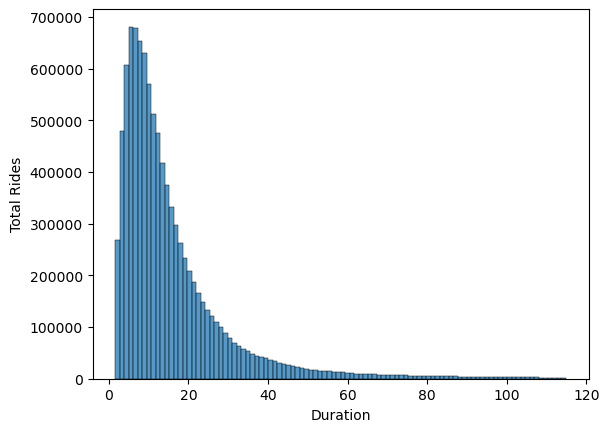

In [43]:
# histplot to see distribution of duration 
 
sns.histplot(df_rides['trip_duration'], kde=False, bins=100)

plt.xlabel('Duration')
plt.ylabel('Total Rides')

plt.show()

In [44]:
# review rides with same start and end station name
df_filtered = df_rides[df_rides['start_station_name'] == df_rides['end_station_name']]
df_filtered

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
17,electric_bike,2021-01-01 00:26:54,2021-01-01 00:55:11,14th & Belmont St NW,31119,14th & Belmont St NW,31119,38.921041,-77.032012,38.920907,-77.031830,member,28.283333
56,electric_bike,2021-01-01 01:16:38,2021-01-01 01:39:50,Massachusetts Ave & 6th St NE,31657,Massachusetts Ave & 6th St NE,31657,38.892966,-76.998287,38.892975,-76.998299,casual,23.200000
159,electric_bike,2021-01-01 05:34:21,2021-01-01 06:04:04,Massachusetts Ave & 6th St NE,31657,Massachusetts Ave & 6th St NE,31657,38.892954,-76.998307,38.892941,-76.998283,casual,29.716667
255,electric_bike,2021-01-01 08:58:04,2021-01-01 09:28:23,Massachusetts Ave & 6th St NE,31657,Massachusetts Ave & 6th St NE,31657,38.892972,-76.998272,38.892972,-76.998261,casual,30.316667
262,electric_bike,2021-01-01 09:10:24,2021-01-01 10:29:54,New York Ave & Hecht Ave NE,31518,New York Ave & Hecht Ave NE,31518,38.915664,-76.983784,38.915466,-76.983775,casual,79.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828734,electric_bike,2023-12-31 22:11:11,2023-12-31 23:25:55,Jefferson Dr & 14th St SW,31247,Jefferson Dr & 14th St SW,31247,38.888601,-77.032465,38.888553,-77.032427,casual,74.733333
9828786,electric_bike,2023-12-31 22:28:11,2023-12-31 22:41:58,11th & Clifton St NW,31136,11th & Clifton St NW,31136,38.922156,-77.027091,38.922324,-77.027086,member,13.783333
9828890,electric_bike,2023-12-31 22:57:30,2023-12-31 23:01:35,11th & Clifton St NW,31136,11th & Clifton St NW,31136,38.922153,-77.027142,38.922324,-77.027086,member,4.083333
9828981,electric_bike,2023-12-31 23:33:03,2023-12-31 23:40:46,14th & Irving St NW,31124,14th & Irving St NW,31124,38.928680,-77.032190,38.928552,-77.032224,member,7.716667


* 40K round trips out of nearly 10 million rides, the ratio seems realistic
* longer rides are associated with casual users and show slight variations in geo locations 
* short rides exhibit similar differences as well, suggesting they all represent real rides

In [45]:
# review records with nan values both on start and end station 
df_filtered = df_rides[df_rides['start_station_name'].isna() & df_rides['end_station_name'].isna()]
df_filtered

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
31,electric_bike,2021-01-01 00:50:13,2021-01-01 00:57:14,NaN,<NA>,NaN,<NA>,38.95,-77.03,38.93,-77.04,casual,7.016667
57,electric_bike,2021-01-01 01:16:41,2021-01-01 01:25:02,NaN,<NA>,NaN,<NA>,38.92,-77.03,38.90,-77.05,casual,8.350000
69,electric_bike,2021-01-01 01:36:07,2021-01-01 02:01:25,NaN,<NA>,NaN,<NA>,38.91,-77.03,38.97,-77.03,casual,25.300000
72,electric_bike,2021-01-01 01:41:56,2021-01-01 02:04:11,NaN,<NA>,NaN,<NA>,38.97,-77.07,38.95,-77.09,casual,22.250000
87,electric_bike,2021-01-01 02:07:24,2021-01-01 02:59:43,NaN,<NA>,NaN,<NA>,38.91,-77.02,38.89,-76.94,casual,52.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828998,electric_bike,2023-12-31 23:36:11,2024-01-01 00:00:20,NaN,<NA>,NaN,<NA>,38.92,-76.98,38.91,-76.98,member,24.150000
9829018,electric_bike,2023-12-31 23:40:22,2024-01-01 00:05:50,NaN,<NA>,NaN,<NA>,38.92,-76.99,38.90,-77.07,casual,25.466667
9829022,electric_bike,2023-12-31 23:41:46,2023-12-31 23:47:06,NaN,<NA>,NaN,<NA>,38.94,-77.03,38.94,-77.02,casual,5.333333
9829025,electric_bike,2023-12-31 23:43:05,2023-12-31 23:46:24,NaN,<NA>,NaN,<NA>,38.94,-77.03,38.94,-77.02,casual,3.316667


In [46]:
df_filtered['rideable_type'].value_counts()

rideable_type
electric_bike    301731
classic_bike          0
docked_bike           0
Name: count, dtype: int64

* all of the rides were made with e-bikes and have different location values at the start and end. 
* with 2-decimal precision the minimum difference between two points is approximately 1 kilometer, indicating that these are real rides

In [47]:
df_rides['rideable_type'].value_counts()

rideable_type
classic_bike     7175417
electric_bike    2248249
docked_bike       405395
Name: count, dtype: int64

In [48]:
df_rides['start_station_name'].nunique()

858

In [49]:
df_rides['start_station_id'].nunique()

771

* there is also a difference between number of unique station names and station ids, which we need to resolve  
* the reason could be that a station name is associated with multiple ids, and vice versa

In [50]:
# group by 'start_station_name' and get the unique 'start_station_id' for each station
start_station_ids = df_rides.groupby('start_station_name')['start_station_id'].unique().reset_index()

# add a new column to count the number of unique station IDs for each station name
start_station_ids['num_ids'] = start_station_ids['start_station_id'].apply(len)

# filter the rows where there is more than one unique station ID for the same name
stations_with_multiple_ids = start_station_ids[start_station_ids['num_ids'] > 1].reset_index(drop=True)

stations_with_multiple_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_station_name  3 non-null      object
 1   start_station_id    3 non-null      object
 2   num_ids             3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [51]:
stations_with_multiple_ids

,start_station_name,start_station_id,num_ids
0,16th & Harvard St NW,"[31103, 31135]",2
1,Fairfax Dr & N Taylor St,"[31974, 31049]",2
2,Randle Circle & Minnesota Ave SE,"[31702, 31799]",2


In [52]:
df_rides[df_rides['start_station_name'] == '16th & Harvard St NW']

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
184,classic_bike,2021-01-01 06:52:40,2021-01-01 06:55:51,16th & Harvard St NW,31103,New Hampshire Ave & T St NW,31229,38.926088,-77.036536,38.915544,-77.038252,member,3.183333
290,classic_bike,2021-01-01 09:34:03,2021-01-01 09:36:27,16th & Harvard St NW,31103,14th & Irving St NW,31124,38.926088,-77.036536,38.928552,-77.032224,member,2.400000
420,classic_bike,2021-01-01 11:20:28,2021-01-01 11:35:13,16th & Harvard St NW,31103,18th & M St NW,31221,38.926088,-77.036536,38.905067,-77.041779,casual,14.750000
540,classic_bike,2021-01-01 13:41:45,2021-01-01 13:49:12,16th & Harvard St NW,31103,16th & R St NW,31282,38.926088,-77.036536,38.912652,-77.036278,member,7.450000
650,classic_bike,2021-01-01 15:04:08,2021-01-01 15:12:36,16th & Harvard St NW,31103,10th & U St NW,31111,38.926088,-77.036536,38.917200,-77.025900,member,8.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828255,electric_bike,2023-12-31 20:10:04,2023-12-31 20:16:07,16th & Harvard St NW,31135,NaN,<NA>,38.926111,-77.036707,38.930000,-77.030000,casual,6.050000
9828509,electric_bike,2023-12-31 21:08:13,2023-12-31 21:13:51,16th & Harvard St NW,31135,17th & Corcoran St NW,31214,38.926256,-77.036775,38.912100,-77.038700,casual,5.633333
9828648,electric_bike,2023-12-31 21:48:35,2023-12-31 21:53:33,16th & Harvard St NW,31135,14th St & Spring Rd NW,31401,38.926107,-77.036656,38.937500,-77.032800,casual,4.966667
9828842,electric_bike,2023-12-31 22:43:52,2023-12-31 22:48:44,16th & Harvard St NW,31135,14th & Belmont St NW,31119,38.926092,-77.036658,38.921074,-77.031887,member,4.866667


* station name: '16th & Harvard St NW' has 2 ids as follows: 31103 and 31135
* start_lat	and start_lng values are same till 4th decimal(around 10 meter detail) which assures that this name has duplicate ids

In [53]:
df_rides[df_rides['start_station_name'] == 'Fairfax Dr & N Taylor St']

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
4224603,classic_bike,2022-07-26 16:59:34,2022-07-26 17:01:08,Fairfax Dr & N Taylor St,31974,Fairfax Dr & N Randolph St,31034,38.882425,-77.112754,38.882629,-77.109366,member,1.566667
4231341,classic_bike,2022-07-27 08:38:01,2022-07-27 08:52:07,Fairfax Dr & N Taylor St,31974,Arlington Blvd & S George Mason Dr,31078,38.882425,-77.112754,38.869442,-77.104503,casual,14.100000
4235853,classic_bike,2022-07-27 16:22:18,2022-07-27 16:27:03,Fairfax Dr & N Taylor St,31974,Glebe Rd & 11th St N,31038,38.882425,-77.112754,38.883921,-77.116817,member,4.750000
4236082,electric_bike,2022-07-27 16:38:53,2022-07-27 16:43:02,Fairfax Dr & N Taylor St,31974,Fairfax Dr & Wilson Blvd,31023,38.882276,-77.112660,38.885801,-77.097745,member,4.150000
4246023,classic_bike,2022-07-28 13:29:24,2022-07-28 13:38:51,Fairfax Dr & N Taylor St,31974,N Pershing Dr & Quebec St,31973,38.882425,-77.112754,38.874248,-77.104784,member,9.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822913,electric_bike,2023-12-31 08:23:31,2023-12-31 08:34:02,Fairfax Dr & N Taylor St,31049,NaN,<NA>,38.882322,-77.112824,38.860000,-77.110000,member,10.516667
9823748,classic_bike,2023-12-31 11:12:04,2023-12-31 11:19:48,Fairfax Dr & N Taylor St,31049,Washington-Liberty High School / N Stafford St...,31920,38.882425,-77.112754,38.888282,-77.111066,casual,7.733333
9827294,electric_bike,2023-12-31 17:21:40,2023-12-31 17:31:54,Fairfax Dr & N Taylor St,31049,Westover Library / Washington Blvd & N McKinle...,31921,38.882345,-77.112810,38.886048,-77.142317,member,10.233333
9827499,classic_bike,2023-12-31 17:48:56,2023-12-31 17:51:39,Fairfax Dr & N Taylor St,31049,Glebe Rd & 11th St N,31038,38.882425,-77.112754,38.883921,-77.116817,member,2.716667


* same situation for this station too
* I will choose the latest id number for each station name and update ids accordingly

In [54]:
df_rides.loc[df_rides['start_station_name'] == '16th & Harvard St NW', 'start_station_id'] = 31135
df_rides.loc[df_rides['start_station_name'] == 'Fairfax Dr & N Taylor St', 'start_station_id'] = 31049
df_rides.loc[df_rides['start_station_name'] == 'Randle Circle & Minnesota Ave SE', 'start_station_id'] = 31799

In [55]:
df_rides[df_rides['start_station_name'] == '16th & Harvard St NW']

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
184,classic_bike,2021-01-01 06:52:40,2021-01-01 06:55:51,16th & Harvard St NW,31135,New Hampshire Ave & T St NW,31229,38.926088,-77.036536,38.915544,-77.038252,member,3.183333
290,classic_bike,2021-01-01 09:34:03,2021-01-01 09:36:27,16th & Harvard St NW,31135,14th & Irving St NW,31124,38.926088,-77.036536,38.928552,-77.032224,member,2.400000
420,classic_bike,2021-01-01 11:20:28,2021-01-01 11:35:13,16th & Harvard St NW,31135,18th & M St NW,31221,38.926088,-77.036536,38.905067,-77.041779,casual,14.750000
540,classic_bike,2021-01-01 13:41:45,2021-01-01 13:49:12,16th & Harvard St NW,31135,16th & R St NW,31282,38.926088,-77.036536,38.912652,-77.036278,member,7.450000
650,classic_bike,2021-01-01 15:04:08,2021-01-01 15:12:36,16th & Harvard St NW,31135,10th & U St NW,31111,38.926088,-77.036536,38.917200,-77.025900,member,8.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9828255,electric_bike,2023-12-31 20:10:04,2023-12-31 20:16:07,16th & Harvard St NW,31135,NaN,<NA>,38.926111,-77.036707,38.930000,-77.030000,casual,6.050000
9828509,electric_bike,2023-12-31 21:08:13,2023-12-31 21:13:51,16th & Harvard St NW,31135,17th & Corcoran St NW,31214,38.926256,-77.036775,38.912100,-77.038700,casual,5.633333
9828648,electric_bike,2023-12-31 21:48:35,2023-12-31 21:53:33,16th & Harvard St NW,31135,14th St & Spring Rd NW,31401,38.926107,-77.036656,38.937500,-77.032800,casual,4.966667
9828842,electric_bike,2023-12-31 22:43:52,2023-12-31 22:48:44,16th & Harvard St NW,31135,14th & Belmont St NW,31119,38.926092,-77.036658,38.921074,-77.031887,member,4.866667


In [56]:
# check the Start station IDs which have multiple names
# group by 'start_station_id' and get the unique 'start_station_name' for each ID
station_names = df_rides.groupby('start_station_id')['start_station_name'].unique().reset_index()

# ddd a new column to count the number of unique station names for each station ID
station_names['num_names'] = station_names['start_station_name'].apply(len)

# filter the rows where there is more than one unique station name for the same ID
ids_with_multiple_names = station_names[station_names['num_names'] > 1].reset_index(drop=True)

ids_with_multiple_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   start_station_id    82 non-null     Int64 
 1   start_station_name  82 non-null     object
 2   num_names           82 non-null     int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [57]:
ids_with_multiple_names.head(10)

,start_station_id,start_station_name,num_names
0,31006,"[Army Navy Dr & S Joyce St, Pentagon Row Plaza...",2
1,31014,"[Lynn St & 19th St North, 19th St N & Ft Myer Dr]",2
2,31015,"[Rosslyn Metro / Wilson Blvd & Ft Myer Dr, Wil...",2
3,31027,"[Key Blvd & N Quinn St, Wilson Blvd & N Quinn St]",2
4,31030,"[Lee Hwy & N Adams St, Langston Blvd & N Adams...",2
5,31040,"[GMU / Fairfax Dr & Kenmore St, GMU/Fairfax Dr...",2
6,31047,"[Braddock Rd Metro, Braddock Rd Metro North]",2
7,31049,"[Utah St & 11th St N, Fairfax Dr & N Taylor St]",2
8,31051,"[Arlington Blvd & N Queen St, 12th St N & N Pi...",2
9,31056,"[Troy St & 26th St S, S Troy St & 26th St S]",2


In [58]:
df_rides[df_rides['start_station_id'] == 31030]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
488,electric_bike,2021-01-01 12:48:18,2021-01-01 13:09:00,Lee Hwy & N Adams St,31030,Columbia Pike & S Oakland St,31058,38.895969,-77.089021,38.860789,-77.095886,casual,20.700000
1144,classic_bike,2021-01-02 09:47:15,2021-01-02 09:52:16,Lee Hwy & N Adams St,31030,Wilson Blvd & N Uhle St,31017,38.895930,-77.089006,38.891696,-77.084600,member,5.016667
3586,classic_bike,2021-01-02 15:00:33,2021-01-02 15:15:06,Lee Hwy & N Adams St,31030,Roosevelt Island,31062,38.895930,-77.089006,38.896553,-77.067140,member,14.550000
7410,classic_bike,2021-01-04 08:11:36,2021-01-04 08:18:25,Lee Hwy & N Adams St,31030,Lynn St & 19th St North,31014,38.895930,-77.089006,38.897315,-77.070993,member,6.816667
9652,classic_bike,2021-01-04 20:42:14,2021-01-04 20:45:43,Lee Hwy & N Adams St,31030,Lee Hwy & N Kirkwood Rd,31094,38.895930,-77.089006,38.895377,-77.097130,member,3.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817335,classic_bike,2023-12-30 11:58:04,2023-12-30 12:05:52,Langston Blvd & N Adams St,31030,Washington Blvd & 10th St N,31026,38.895930,-77.089006,38.884734,-77.093485,member,7.800000
9817360,classic_bike,2023-12-30 12:00:26,2023-12-30 12:32:05,Langston Blvd & N Adams St,31030,4th & M St SW,31108,38.895930,-77.089006,38.876823,-77.017774,member,31.650000
9820760,electric_bike,2023-12-30 17:32:30,2023-12-30 17:39:28,Langston Blvd & N Adams St,31030,NaN,<NA>,38.896010,-77.089040,38.890000,-77.080000,casual,6.966667
9824048,electric_bike,2023-12-31 11:47:51,2023-12-31 11:58:08,Langston Blvd & N Adams St,31030,Wilson Blvd & N Quincy St,31039,38.895912,-77.088910,38.880012,-77.107854,member,10.283333


* on this station id, it looks like a name change since all other features have the same values 

In [59]:
df_rides[df_rides['start_station_id'] == 31027]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
1098,classic_bike,2021-01-02 09:28:00,2021-01-02 09:35:01,Key Blvd & N Quinn St,31027,Roosevelt Island,31062,38.896355,-77.078408,38.896553,-77.067140,member,7.016667
4516,classic_bike,2021-01-02 16:30:02,2021-01-02 16:51:05,Key Blvd & N Quinn St,31027,Lynn St & 19th St North,31014,38.896355,-77.078408,38.897315,-77.070993,member,21.050000
6302,classic_bike,2021-01-03 12:45:51,2021-01-03 13:55:18,Key Blvd & N Quinn St,31027,Lee Hwy & N Scott St,31080,38.896355,-77.078408,38.897612,-77.080851,casual,69.450000
8698,electric_bike,2021-01-04 15:52:16,2021-01-04 16:09:33,Key Blvd & N Quinn St,31027,NaN,<NA>,38.896377,-77.078395,38.900000,-77.070000,member,17.283333
9378,electric_bike,2021-01-04 18:30:58,2021-01-04 18:40:10,Key Blvd & N Quinn St,31027,Washington Blvd & 10th St N,31026,38.896287,-77.078397,38.884695,-77.093558,member,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825741,electric_bike,2023-12-31 14:40:30,2023-12-31 15:04:02,Wilson Blvd & N Quinn St,31027,34th & Water St NW,31314,38.894000,-77.078535,38.903731,-77.067528,casual,23.533333
9825846,electric_bike,2023-12-31 14:50:02,2023-12-31 15:04:06,Wilson Blvd & N Quinn St,31027,Arlington Blvd & S George Mason Dr,31078,38.893987,-77.078581,38.869442,-77.104503,member,14.066667
9825970,classic_bike,2023-12-31 15:05:23,2023-12-31 15:18:09,Wilson Blvd & N Quinn St,31027,Virginia Ave & 25th St NW,31297,38.893993,-77.078570,38.898460,-77.053052,member,12.766667
9826043,classic_bike,2023-12-31 15:12:48,2023-12-31 15:14:46,Wilson Blvd & N Quinn St,31027,Langston Blvd & N Scott St,31080,38.893993,-77.078570,38.897612,-77.080851,member,1.966667


* here we have a name change + a location change
* geo coordinates are approximately has 300 meters of distance. 

In [60]:
ids_with_multiple_names.tail()

,start_station_id,start_station_name,num_names
77,32250,"[South Gate Community Center, Glade Dr & Pinec...",2
78,32261,[Vaden Dr & Royal Victoria Dr/Providence Commu...,2
79,32270,"[Westbranch Dr & Jones Branch Dr, Westbranch &...",2
80,32600,[George Mason High School / Haycock Rd & Leesb...,3
81,32601,"[State Theatre / Park Pl & N Washington St, Ed...",2


In [61]:
df_rides[df_rides['start_station_id'] == 32600]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
3523,classic_bike,2021-01-02 14:55:01,2021-01-02 15:39:01,George Mason High School / Haycock Rd & Leesbu...,32600,S Arlington Mill Dr & Campbell Ave,31060,38.895172,-77.190275,38.842320,-77.089555,member,44.000000
10289,electric_bike,2021-01-05 09:13:51,2021-01-05 09:40:20,George Mason High School / Haycock Rd & Leesbu...,32600,Barcroft Community Center,31033,38.895161,-77.190238,38.850370,-77.100985,casual,26.483333
26000,classic_bike,2021-01-10 13:51:25,2021-01-10 14:23:51,George Mason High School / Haycock Rd & Leesbu...,32600,Towers Crescent Dr & Tysons One Pl,32222,38.895172,-77.190275,38.915246,-77.220157,casual,32.433333
32238,classic_bike,2021-01-12 15:07:36,2021-01-12 15:16:42,George Mason High School / Haycock Rd & Leesbu...,32600,N Oak St & W Broad St,32602,38.895172,-77.190275,38.888370,-77.179832,member,9.100000
42605,electric_bike,2021-01-15 15:07:29,2021-01-15 15:31:22,George Mason High School / Haycock Rd & Leesbu...,32600,S Maple Ave & S Washington St,32607,38.895203,-77.190270,38.879837,-77.178331,casual,23.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9792676,classic_bike,2023-12-25 14:23:35,2023-12-25 14:35:42,Founders Row/W Broad St & West St,32600,W&OD Trail & Langston Blvd,31948,38.890155,-77.183178,38.887150,-77.162120,casual,12.116667
9801404,electric_bike,2023-12-28 09:52:16,2023-12-28 09:56:23,Founders Row/W Broad St & West St,32600,West Falls Church Metro,32232,38.890121,-77.183193,38.900100,-77.188700,member,4.116667
9820336,electric_bike,2023-12-30 16:46:38,2023-12-30 16:50:22,Founders Row/W Broad St & West St,32600,West Falls Church Metro,32232,38.890288,-77.183057,38.900100,-77.188700,member,3.733333
9828714,electric_bike,2023-12-31 22:07:17,2023-12-31 22:28:51,Founders Row/W Broad St & West St,32600,NaN,<NA>,38.890271,-77.183126,38.880000,-77.170000,casual,21.566667


* there is always a name change while some records also have a location change 
* I will standardize the dataset by using latest name and updating old names accordingly 

In [62]:
# group by 'start_station_id', get the most recent 'start_station_name' 
df_rides['start_station_name'] = df_rides.groupby('start_station_id')['start_station_name'].transform('last')

In [63]:
df_rides[df_rides['start_station_id'] == 32600]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
3523,classic_bike,2021-01-02 14:55:01,2021-01-02 15:39:01,Founders Row/W Broad St & West St,32600,S Arlington Mill Dr & Campbell Ave,31060,38.895172,-77.190275,38.842320,-77.089555,member,44.000000
10289,electric_bike,2021-01-05 09:13:51,2021-01-05 09:40:20,Founders Row/W Broad St & West St,32600,Barcroft Community Center,31033,38.895161,-77.190238,38.850370,-77.100985,casual,26.483333
26000,classic_bike,2021-01-10 13:51:25,2021-01-10 14:23:51,Founders Row/W Broad St & West St,32600,Towers Crescent Dr & Tysons One Pl,32222,38.895172,-77.190275,38.915246,-77.220157,casual,32.433333
32238,classic_bike,2021-01-12 15:07:36,2021-01-12 15:16:42,Founders Row/W Broad St & West St,32600,N Oak St & W Broad St,32602,38.895172,-77.190275,38.888370,-77.179832,member,9.100000
42605,electric_bike,2021-01-15 15:07:29,2021-01-15 15:31:22,Founders Row/W Broad St & West St,32600,S Maple Ave & S Washington St,32607,38.895203,-77.190270,38.879837,-77.178331,casual,23.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9792676,classic_bike,2023-12-25 14:23:35,2023-12-25 14:35:42,Founders Row/W Broad St & West St,32600,W&OD Trail & Langston Blvd,31948,38.890155,-77.183178,38.887150,-77.162120,casual,12.116667
9801404,electric_bike,2023-12-28 09:52:16,2023-12-28 09:56:23,Founders Row/W Broad St & West St,32600,West Falls Church Metro,32232,38.890121,-77.183193,38.900100,-77.188700,member,4.116667
9820336,electric_bike,2023-12-30 16:46:38,2023-12-30 16:50:22,Founders Row/W Broad St & West St,32600,West Falls Church Metro,32232,38.890288,-77.183057,38.900100,-77.188700,member,3.733333
9828714,electric_bike,2023-12-31 22:07:17,2023-12-31 22:28:51,Founders Row/W Broad St & West St,32600,NaN,<NA>,38.890271,-77.183126,38.880000,-77.170000,casual,21.566667


In [64]:
df_rides['start_station_name'].nunique()

770

In [65]:
df_rides['start_station_id'].nunique()

770

In [66]:
# follow same steps for end station names and ids
df_rides['end_station_id'].nunique()

773

In [67]:
df_rides['end_station_name'].nunique()

860

In [68]:

start_station_ids = df_rides.groupby('end_station_name')['end_station_id'].unique().reset_index()

start_station_ids['num_names'] = start_station_ids['end_station_id'].apply(len)

stations_with_multiple_ids = start_station_ids[start_station_ids['num_names'] > 1].reset_index(drop=True)

stations_with_multiple_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   end_station_name  4 non-null      object
 1   end_station_id    4 non-null      object
 2   num_names         4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [69]:
stations_with_multiple_ids

,end_station_name,end_station_id,num_names
0,16th & Harvard St NW,"[31103, 31135]",2
1,Fairfax Dr & N Taylor St,"[31974, 31049]",2
2,Randle Circle & Minnesota Ave SE,"[31702, 31799]",2
3,S Wayne and 9th St,"[31980, 31971]",2


* first 3 are the same stations I just corrected for the start station names and ids

In [70]:
df_rides[df_rides['end_station_name'] == 'S Wayne and 9th St']

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
9031004,classic_bike,2023-10-18 14:43:37,2023-10-18 14:46:45,Columbia Pike & S Courthouse Rd,31053,S Wayne and 9th St,31980,38.863833,-77.080319,38.864519,-77.083636,member,3.133333
9034065,electric_bike,2023-10-18 17:23:10,2023-10-18 17:43:56,NaN,<NA>,S Wayne and 9th St,31980,38.910000,-77.070000,38.864519,-77.083636,member,20.766667
9049382,electric_bike,2023-10-19 17:20:24,2023-10-19 17:38:49,Court House Metro / 15th St & N Uhle St,31089,S Wayne and 9th St,31971,38.890600,-77.084804,38.864519,-77.083636,member,18.416667
9049584,classic_bike,2023-10-19 17:27:07,2023-10-19 17:56:46,37th & O St NW / Georgetown University,31236,S Wayne and 9th St,31971,38.907837,-77.071660,38.864519,-77.083636,member,29.650000


* station does not appear in the start stations data and only has 4 rides over a 3-year period is likely an anomaly

In [71]:
df_rides = df_rides[df_rides['end_station_name'] != 'S Wayne and 9th St'].reset_index(drop=True)


In [72]:
# Update the 'end_station_id' for stations with multiple ids
df_rides.loc[df_rides['end_station_name'] == '16th & Harvard St NW', 'end_station_id'] = 31135
df_rides.loc[df_rides['end_station_name'] == 'Fairfax Dr & N Taylor St', 'end_station_id'] = 31049
df_rides.loc[df_rides['end_station_name'] == 'Randle Circle & Minnesota Ave SE', 'end_station_id'] = 31799

In [73]:
# check ids with multiple names in end stations
station_names = df_rides.groupby('end_station_id')['end_station_name'].unique().reset_index()

station_names['num_names'] = station_names['end_station_name'].apply(len)

ids_with_multiple_names = station_names[station_names['num_names'] > 1].reset_index(drop=True)

ids_with_multiple_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   end_station_id    83 non-null     Int64 
 1   end_station_name  83 non-null     object
 2   num_names         83 non-null     int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [74]:
ids_with_multiple_names.head(10)

,end_station_id,end_station_name,num_names
0,31006,"[Army Navy Dr & S Joyce St, Pentagon Row Plaza...",2
1,31014,"[Lynn St & 19th St North, 19th St N & Ft Myer Dr]",2
2,31015,"[Rosslyn Metro / Wilson Blvd & Ft Myer Dr, Wil...",2
3,31027,"[Key Blvd & N Quinn St, Wilson Blvd & N Quinn St]",2
4,31030,"[Lee Hwy & N Adams St, Langston Blvd & N Adams...",2
5,31040,"[GMU / Fairfax Dr & Kenmore St, GMU/Fairfax Dr...",2
6,31047,"[Braddock Rd Metro, Braddock Rd Metro North]",2
7,31049,"[Utah St & 11th St N, Fairfax Dr & N Taylor St]",2
8,31051,"[Arlington Blvd & N Queen St, 12th St N & N Pi...",2
9,31056,"[Troy St & 26th St S, S Troy St & 26th St S]",2


In [75]:
df_rides[df_rides['end_station_id'] == 31006]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
1633,electric_bike,2021-01-02 11:39:50,2021-01-02 12:12:11,17th & Corcoran St NW,31214,Army Navy Dr & S Joyce St,31006,38.912132,-77.038629,38.863394,-77.063389,casual,32.350000
1718,classic_bike,2021-01-02 11:53:20,2021-01-02 11:58:35,Pentagon City Metro / 12th St & S Hayes St,31005,Army Navy Dr & S Joyce St,31006,38.862303,-77.059936,38.863700,-77.063300,member,5.250000
2456,classic_bike,2021-01-02 13:16:25,2021-01-02 13:36:33,Crystal Dr & 23rd St S,31011,Army Navy Dr & S Joyce St,31006,38.853300,-77.049800,38.863700,-77.063300,member,20.133333
3220,electric_bike,2021-01-02 14:28:43,2021-01-02 15:02:40,Mount Vernon Ave & E Nelson Ave,31085,Army Navy Dr & S Joyce St,31006,38.820069,-77.057654,38.863274,-77.063360,casual,33.950000
3268,electric_bike,2021-01-02 14:32:56,2021-01-02 15:02:29,Monroe Ave & Leslie Ave,31087,Army Navy Dr & S Joyce St,31006,38.820953,-77.053057,38.863253,-77.063376,casual,29.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825751,electric_bike,2023-12-31 14:41:19,2023-12-31 15:08:07,Maine Ave & 7th St SW,31609,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.878619,-77.022605,38.863314,-77.063416,member,26.800000
9826095,electric_bike,2023-12-31 15:20:17,2023-12-31 15:26:24,Eads St & 22nd St S,31013,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.854435,-77.053388,38.863314,-77.063416,member,6.116667
9826097,electric_bike,2023-12-31 15:20:31,2023-12-31 15:26:29,Eads St & 22nd St S,31013,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.854378,-77.053407,38.863314,-77.063416,casual,5.966667
9827301,classic_bike,2023-12-31 17:23:01,2023-12-31 17:27:10,Eads St & 12th St S,31071,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.863073,-77.054541,38.863314,-77.063416,member,4.150000


In [76]:
df_rides['end_station_name'] = df_rides.groupby('end_station_id')['end_station_name'].transform('last')

In [77]:
df_rides[df_rides['end_station_id'] == 31006]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
1633,electric_bike,2021-01-02 11:39:50,2021-01-02 12:12:11,17th & Corcoran St NW,31214,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.912132,-77.038629,38.863394,-77.063389,casual,32.350000
1718,classic_bike,2021-01-02 11:53:20,2021-01-02 11:58:35,Pentagon City Metro / 12th St & S Hayes St,31005,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.862303,-77.059936,38.863700,-77.063300,member,5.250000
2456,classic_bike,2021-01-02 13:16:25,2021-01-02 13:36:33,Crystal Dr & 23rd St S,31011,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.853300,-77.049800,38.863700,-77.063300,member,20.133333
3220,electric_bike,2021-01-02 14:28:43,2021-01-02 15:02:40,Mount Vernon Ave & E Nelson Ave,31085,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.820069,-77.057654,38.863274,-77.063360,casual,33.950000
3268,electric_bike,2021-01-02 14:32:56,2021-01-02 15:02:29,Monroe Ave & Leslie Ave,31087,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.820953,-77.053057,38.863253,-77.063376,casual,29.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825751,electric_bike,2023-12-31 14:41:19,2023-12-31 15:08:07,Maine Ave & 7th St SW,31609,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.878619,-77.022605,38.863314,-77.063416,member,26.800000
9826095,electric_bike,2023-12-31 15:20:17,2023-12-31 15:26:24,Eads St & 22nd St S,31013,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.854435,-77.053388,38.863314,-77.063416,member,6.116667
9826097,electric_bike,2023-12-31 15:20:31,2023-12-31 15:26:29,Eads St & 22nd St S,31013,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.854378,-77.053407,38.863314,-77.063416,casual,5.966667
9827301,classic_bike,2023-12-31 17:23:01,2023-12-31 17:27:10,Eads St & 12th St S,31071,Pentagon Row Plaza / Army Navy Dr & Joyce St,31006,38.863073,-77.054541,38.863314,-77.063416,member,4.150000


In [78]:
df_rides['end_station_id'].nunique()

771

In [79]:
df_rides['end_station_name'].nunique()

771

In [80]:
df_rides['start_station_id'].nunique()

770

In [81]:
df_rides['start_station_name'].nunique()

770

* start and end stations do not necessarily have to fit perfectly since some may be for only picking or leaving the bike but it needs to be checked 

In [82]:
# find the station which is missing in start stations 
set(df_rides['end_station_name'].unique()) - set(df_rides['start_station_name'].unique())

{'Kingsbridge Dr & Draper Dr'}

In [83]:
df_rides[df_rides['end_station_name'] == 'Kingsbridge Dr & Draper Dr']

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
9819301,classic_bike,2023-12-30 15:15:07,2023-12-30 15:19:16,Mission Square Dr & Miranda Ct,31397,Kingsbridge Dr & Draper Dr,31387,38.868979,-77.275484,38.868545,-77.282083,member,4.15


* this is also an anomaly with 1 ride so i will remove it

In [84]:
df_rides = df_rides[df_rides['end_station_name'] != 'Kingsbridge Dr & Draper Dr'].reset_index(drop=True)
df_rides['end_station_name'].nunique()

770

In [85]:
df_rides.isna().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    604115
start_station_id      604115
end_station_name      633371
end_station_id        633371
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
trip_duration              0
dtype: int64

In [86]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9829056 entries, 0 to 9829055
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       category      
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   start_station_id    Int64         
 5   end_station_name    object        
 6   end_station_id      Int64         
 7   start_lat           float64       
 8   start_lng           float64       
 9   end_lat             float64       
 10  end_lng             float64       
 11  member_casual       category      
 12  trip_duration       float64       
dtypes: Int64(2), category(2), datetime64[ns](2), float64(5), object(2)
memory usage: 862.4+ MB


In [87]:
df_rides

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,<NA>,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000
2,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
3,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
4,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,<NA>,Georgia Ave & Kennedy St NW,31415,38.930000,-77.030000,38.956738,-77.027940,casual,10.816667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829051,classic_bike,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
9829052,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333
9829053,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955,Market Square / King St & Royal St,31042,38.806002,-77.055911,38.804718,-77.043363,member,14.383333
9829054,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884185,-76.995396,38.890461,-76.988355,member,4.016667


In [88]:
# review the bike types data distribution 
df_rides['rideable_type'].value_counts()

rideable_type
classic_bike     7175414
electric_bike    2248247
docked_bike       405395
Name: count, dtype: int64

In [89]:
df_filtered = df_rides[df_rides['rideable_type'] == 'classic_bike']
df_filtered

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
3,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
5,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617,MLK & Marion Barry Ave SE,31802,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667
8,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131,14th & R St NW,31202,38.934405,-77.032687,38.913046,-77.032008,member,9.466667
9,classic_bike,2021-01-01 00:24:12,2021-01-01 00:47:47,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,23.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829046,classic_bike,2023-12-31 23:53:54,2023-12-31 23:58:07,Georgetown Harbor / 30th St NW,31215,Virginia Ave & 25th St NW,31297,38.902268,-77.059117,38.898460,-77.053052,casual,4.216667
9829049,classic_bike,2023-12-31 23:54:49,2024-01-01 01:15:59,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,Independence Ave & L'Enfant Plaza SW/DOE,31633,38.888774,-77.028694,38.887312,-77.025762,casual,81.166667
9829051,classic_bike,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
9829052,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333


In [90]:
df_filtered = df_rides[df_rides['rideable_type'] == 'electric_bike']
df_filtered

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
1,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,<NA>,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000
2,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
4,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,<NA>,Georgia Ave & Kennedy St NW,31415,38.930000,-77.030000,38.956738,-77.027940,casual,10.816667
6,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115,NaN,<NA>,38.928081,-77.023768,38.900000,-77.020000,casual,14.933333
15,electric_bike,2021-01-01 00:26:41,2021-01-01 00:30:09,14th & Harvard St NW,31105,NaN,<NA>,38.926715,-77.032145,38.930000,-77.040000,member,3.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829047,electric_bike,2023-12-31 23:54:00,2024-01-01 00:11:43,17th & P St NW,31330,Georgia Ave & Morton St NW,31419,38.909865,-77.038412,38.932128,-77.023500,member,17.716667
9829048,electric_bike,2023-12-31 23:54:07,2024-01-01 00:01:39,Fort Totten Metro,31515,NaN,<NA>,38.952364,-77.002654,38.960000,-76.980000,member,7.533333
9829050,electric_bike,2023-12-31 23:56:22,2023-12-31 23:59:14,14th & Irving St NW,31124,NaN,<NA>,38.928623,-77.032059,38.930000,-77.040000,member,2.866667
9829054,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884185,-76.995396,38.890461,-76.988355,member,4.016667


In [91]:
df_filtered = df_rides[df_rides['rideable_type'] == 'docked_bike']
df_filtered

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
7,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632,1st & M St SE,31650,38.897195,-76.983575,38.876893,-77.006072,casual,12.200000
16,docked_bike,2021-01-01 00:26:51,2021-01-01 00:47:48,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,38.890539,-77.049383,38.899632,-77.031686,casual,20.950000
64,docked_bike,2021-01-01 01:26:32,2021-01-01 01:44:42,Lincoln Memorial,31258,Jefferson Dr & 14th St SW,31247,38.888255,-77.049437,38.888553,-77.032427,casual,18.166667
65,docked_bike,2021-01-01 01:26:45,2021-01-01 01:44:48,Lincoln Memorial,31258,Jefferson Dr & 14th St SW,31247,38.888255,-77.049437,38.888553,-77.032427,casual,18.050000
73,docked_bike,2021-01-01 01:45:54,2021-01-01 03:05:25,Constitution Ave & 2nd St NW/DOL,31271,7th & K St NW,31653,38.892275,-77.013917,38.902674,-77.021392,casual,79.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8536740,docked_bike,2023-09-13 09:56:35,2023-09-13 10:28:59,13th & D St NE,31622,15th St & Pennsylvania Ave NW,31129,38.894832,-76.987633,38.896465,-77.033381,casual,32.400000
8536751,docked_bike,2023-09-13 09:57:21,2023-09-13 10:29:06,13th & D St NE,31622,15th St & Pennsylvania Ave NW,31129,38.894832,-76.987633,38.896465,-77.033381,casual,31.750000
8537083,docked_bike,2023-09-13 10:38:07,2023-09-13 10:54:10,Wilson Blvd & N Quinn St,31027,15th & K St NW,31254,38.893993,-77.078570,38.902000,-77.033530,casual,16.050000
8537546,docked_bike,2023-09-13 11:27:38,2023-09-13 12:32:47,19th St & Constitution Ave NW,31235,3rd St & Pennsylvania Ave SE,31269,38.892212,-77.043074,38.887378,-77.001955,casual,65.150000


In [92]:
df_filtered['member_casual'].value_counts()

member_casual
casual    405394
member         1
Name: count, dtype: int64

* data appears consistent regarding stations, geographical locations and ride durations 
* docked bikes are all used by casual members, with the exception of 1 ride by a member, 
* e-bikes and classic bike are used by both members and casuals types
* docked bike rides also cease entirely in the dataset after 2023-09-13. this may be due to operational changes, service adjustments but we cannot confirm the exact reason
* they represent a small fraction of the dataset, with approximately 400,000 rides out of 10 million total rides
* so I will exclude them from the analysis. this aligns with my goal to predict future bike demand, which should focus on active bike types

In [93]:
# review that 1 ride which is made by a member with a docked_bike
df_filtered[(df_filtered['member_casual'] == 'member') & (df_filtered['rideable_type'] == 'docked_bike')]

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
34689,docked_bike,2021-01-13 11:02:24,2021-01-13 11:07:14,11th & O St NW,31286,15th St & New York Ave NW,31222,38.90843,-77.02714,38.899032,-77.033354,member,4.833333


* while it appears to be a legitimate ride, it is reasonable to exclude it from the analysis
* because it is clearly an anomaly, as 1 out of over 400k docked bike records occurred during the very beginning of the dataset's time range

In [94]:
df_rides = df_rides[df_rides['rideable_type'] != 'docked_bike'].reset_index(drop= True)
df_rides['rideable_type'] = df_rides['rideable_type'].cat.remove_unused_categories() # remove the docked_bike rides from categories  
df_rides

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333
1,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,<NA>,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000
2,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,14.216667
3,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333
4,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,<NA>,Georgia Ave & Kennedy St NW,31415,38.930000,-77.030000,38.956738,-77.027940,casual,10.816667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9423656,classic_bike,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000
9423657,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333
9423658,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955,Market Square / King St & Royal St,31042,38.806002,-77.055911,38.804718,-77.043363,member,14.383333
9423659,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884185,-76.995396,38.890461,-76.988355,member,4.016667


In [95]:
df_rides['rideable_type'].value_counts()


rideable_type
classic_bike     7175414
electric_bike    2248247
Name: count, dtype: int64

In [96]:
# check if removing docked bikes effected stations
df_rides['start_station_name'].nunique()

770

In [97]:
df_rides['start_station_id'].nunique()

770

In [98]:
df_rides['end_station_name'].nunique()

770

In [99]:
df_rides['end_station_id'].nunique()

770

In [100]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9423661 entries, 0 to 9423660
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       category      
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   start_station_id    Int64         
 5   end_station_name    object        
 6   end_station_id      Int64         
 7   start_lat           float64       
 8   start_lng           float64       
 9   end_lat             float64       
 10  end_lng             float64       
 11  member_casual       category      
 12  trip_duration       float64       
dtypes: Int64(2), category(2), datetime64[ns](2), float64(5), object(2)
memory usage: 826.8+ MB


* dataset now contains 9,423,661 rides, reduced from the original total of 10,693,997 rides
* this represents a reduction of approximately 11.8% of the dataset
* additionally, the number of bike types has decreased from 3 to 2, with only classic_bike and electric_bike remaining after removing docked_bike records

In [101]:
# load daily weather data

df_weather = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv.', sep=',', header=0)
df_weather

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [102]:
# remove Casual column since we only need hourly weather details
df_weather = df_weather[['Date', 'Hour','relativehumidity_2m (%)', 'temperature_2m (°C)', 'weathercode (wmo code)', 'windspeed_10m (km/h)' ]]
df_weather

,Date,Hour,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,2021-01-01,0,90,2.4,1,10.2
1,2021-01-01,1,88,1.8,1,10.0
2,2021-01-01,2,87,1.1,2,10.1
3,2021-01-01,3,81,1.6,2,10.6
4,2021-01-01,4,77,1.6,2,9.9
...,...,...,...,...,...,...
26275,2023-12-31,19,71,-7.7,0,3.3
26276,2023-12-31,20,79,-10.2,0,6.7
26277,2023-12-31,21,80,-11.0,0,10.0
26278,2023-12-31,22,80,-10.4,0,8.7


In [103]:
df_weather.columns

Index(['Date', 'Hour', 'relativehumidity_2m (%)', 'temperature_2m (°C)',
       'weathercode (wmo code)', 'windspeed_10m (km/h)'],
      dtype='object')

In [104]:
# rename columns
df_weather = df_weather.rename(columns={
    'Date': 'date', 
    'Hour': 'hour', 
    'relativehumidity_2m (%)': 'humidity', 
    'temperature_2m (°C)': 'temperature',  
    'weathercode (wmo code)': 'wmo_code', 
    'windspeed_10m (km/h)': 'windspeed'
})
df_weather

,date,hour,humidity,temperature,wmo_code,windspeed
0,2021-01-01,0,90,2.4,1,10.2
1,2021-01-01,1,88,1.8,1,10.0
2,2021-01-01,2,87,1.1,2,10.1
3,2021-01-01,3,81,1.6,2,10.6
4,2021-01-01,4,77,1.6,2,9.9
...,...,...,...,...,...,...
26275,2023-12-31,19,71,-7.7,0,3.3
26276,2023-12-31,20,79,-10.2,0,6.7
26277,2023-12-31,21,80,-11.0,0,10.0
26278,2023-12-31,22,80,-10.4,0,8.7


In [105]:
df_weather.dtypes

date            object
hour             int64
humidity         int64
temperature    float64
wmo_code         int64
windspeed      float64
dtype: object

In [106]:
# convert the 'hour' column to string, then concatenate it with 'date'
df_weather['datetime'] = pd.to_datetime(df_weather['date'].astype(str) + ' ' + df_weather['hour'].astype(str).str.zfill(2) + ':00:00')

# Check the result
df_weather.head()

,date,hour,humidity,temperature,wmo_code,windspeed,datetime
0,2021-01-01,0,90,2.4,1,10.2,2021-01-01 00:00:00
1,2021-01-01,1,88,1.8,1,10.0,2021-01-01 01:00:00
2,2021-01-01,2,87,1.1,2,10.1,2021-01-01 02:00:00
3,2021-01-01,3,81,1.6,2,10.6,2021-01-01 03:00:00
4,2021-01-01,4,77,1.6,2,9.9,2021-01-01 04:00:00


In [107]:
df_weather.describe(include='all')

,date,hour,humidity,temperature,wmo_code,windspeed,datetime
count,26280,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280
unique,1095,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.500000,62.967884,14.412782,7.228311,10.171298,2022-07-02 11:30:00
min,NaN,0.000000,5.000000,-14.600000,0.000000,0.000000,2021-01-01 00:00:00
25%,NaN,5.750000,46.000000,6.100000,0.000000,6.500000,2021-10-01 17:45:00
50%,NaN,11.500000,64.000000,14.800000,1.000000,9.200000,2022-07-02 11:30:00
75%,NaN,17.250000,82.000000,22.700000,2.000000,12.900000,2023-04-02 05:15:00
max,NaN,23.000000,100.000000,41.500000,75.000000,40.100000,2023-12-31 23:00:00


In [108]:
# calculate total hours for the date range in df 
365*3*24

26280

In [109]:
df_weather.isna().sum()

date           0
hour           0
humidity       0
temperature    0
wmo_code       0
windspeed      0
datetime       0
dtype: int64

In [110]:
df_weather.duplicated().sum()

0

In [111]:
df_weather['wmo_code'].unique()

array([ 1,  2,  3, 51, 53, 61, 63,  0, 71, 73, 55, 75, 65], dtype=int64)

*  we have 13 types of codes in our dataset:
* I will group these codes in 4 categories based on the distribution of values and their explanations as follows:
    1. clear: clear skies or minimal cloud with no precipitation, codes:0,1,2,3
    2. drizzle: codes: 51,53,55
    3. rain: codes: 61,63,65
    4. snow: codes: 71,73,75
* the full explanation of codes can be found at: https://www.meteopool.org/en/encyclopedia-wmo-ww-wx-code-id2

In [112]:
# function to categorize wmo_code into groups

def categorize_wmo_code(wmo_code):
    if wmo_code in [0, 1, 2, 3]:
        return 'clear'
    elif wmo_code in [51, 53, 55]:
        return 'drizzle'
    elif wmo_code in [61, 63, 65]:
        return 'rain'
    elif wmo_code in [71, 73, 75]:
        return 'snow'

df_weather['wmo_category'] = df_weather['wmo_code'].apply(categorize_wmo_code)
df_weather


,date,hour,humidity,temperature,wmo_code,windspeed,datetime,wmo_category
0,2021-01-01,0,90,2.4,1,10.2,2021-01-01 00:00:00,clear
1,2021-01-01,1,88,1.8,1,10.0,2021-01-01 01:00:00,clear
2,2021-01-01,2,87,1.1,2,10.1,2021-01-01 02:00:00,clear
3,2021-01-01,3,81,1.6,2,10.6,2021-01-01 03:00:00,clear
4,2021-01-01,4,77,1.6,2,9.9,2021-01-01 04:00:00,clear
...,...,...,...,...,...,...,...,...
26275,2023-12-31,19,71,-7.7,0,3.3,2023-12-31 19:00:00,clear
26276,2023-12-31,20,79,-10.2,0,6.7,2023-12-31 20:00:00,clear
26277,2023-12-31,21,80,-11.0,0,10.0,2023-12-31 21:00:00,clear
26278,2023-12-31,22,80,-10.4,0,8.7,2023-12-31 22:00:00,clear


In [113]:
df_weather['wmo_category'] = df_weather['wmo_category'].astype('category')

df_weather.head()

,date,hour,humidity,temperature,wmo_code,windspeed,datetime,wmo_category
0,2021-01-01,0,90,2.4,1,10.2,2021-01-01 00:00:00,clear
1,2021-01-01,1,88,1.8,1,10.0,2021-01-01 01:00:00,clear
2,2021-01-01,2,87,1.1,2,10.1,2021-01-01 02:00:00,clear
3,2021-01-01,3,81,1.6,2,10.6,2021-01-01 03:00:00,clear
4,2021-01-01,4,77,1.6,2,9.9,2021-01-01 04:00:00,clear


In [114]:
# create day  column for rides
df_weather['day'] = df_weather['datetime'].dt.day_name()
df_weather.head()

,date,hour,humidity,temperature,wmo_code,windspeed,datetime,wmo_category,day
0,2021-01-01,0,90,2.4,1,10.2,2021-01-01 00:00:00,clear,Friday
1,2021-01-01,1,88,1.8,1,10.0,2021-01-01 01:00:00,clear,Friday
2,2021-01-01,2,87,1.1,2,10.1,2021-01-01 02:00:00,clear,Friday
3,2021-01-01,3,81,1.6,2,10.6,2021-01-01 03:00:00,clear,Friday
4,2021-01-01,4,77,1.6,2,9.9,2021-01-01 04:00:00,clear,Friday


# Feature Engineering

In [115]:
# add seasons
df_weather['season'] = df_weather['datetime'].apply(
    lambda dt: 'winter' if dt.month in [12, 1, 2] else
               'spring' if dt.month in [3, 4, 5] else
               'summer' if dt.month in [6, 7, 8] else
               'fall'
)


In [116]:
# choose official dates for holidays in Washington DC

holiday_dates = pd.to_datetime([
    # 2021
    '2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-06-19', '2021-07-04',
    '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',
    # 2022
    '2022-01-01', '2022-01-17', '2022-02-21', '2022-05-30', '2022-06-19', '2022-07-04',
    '2022-09-05', '2022-10-10', '2022-11-11', '2022-11-24', '2022-12-25',
    # 2023
    '2023-01-01', '2023-01-16', '2023-02-20', '2023-05-29', '2023-06-19', '2023-07-04',
    '2023-09-04', '2023-10-09', '2023-11-11', '2023-11-23', '2023-12-25',
])


# Ensure holiday_dates is in datetime.date format
holiday_dates = [pd.to_datetime(date).date() for date in holiday_dates]

# Start with all values set to 'no'
df_weather['holiday'] = 'no'

# Mark weekends as holidays using the day derived from the 'datetime' column
df_weather.loc[df_weather['datetime'].dt.day_name().isin(['Saturday', 'Sunday']), 'holiday'] = 'yes'

# Mark official holidays as holidays using the full datetime date
df_weather.loc[df_weather['datetime'].dt.date.isin(holiday_dates), 'holiday'] = 'yes'




df_weather.tail()

,date,hour,humidity,temperature,wmo_code,windspeed,datetime,wmo_category,day,season,holiday
26275,2023-12-31,19,71,-7.7,0,3.3,2023-12-31 19:00:00,clear,Sunday,winter,yes
26276,2023-12-31,20,79,-10.2,0,6.7,2023-12-31 20:00:00,clear,Sunday,winter,yes
26277,2023-12-31,21,80,-11.0,0,10.0,2023-12-31 21:00:00,clear,Sunday,winter,yes
26278,2023-12-31,22,80,-10.4,0,8.7,2023-12-31 22:00:00,clear,Sunday,winter,yes
26279,2023-12-31,23,73,-8.5,0,3.7,2023-12-31 23:00:00,clear,Sunday,winter,yes


In [117]:
def time_of_day(dt):
    hour = dt.hour  # get hour from datetime
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df_weather['time_of_day'] = df_weather['datetime'].apply(time_of_day)
df_weather


,date,hour,humidity,temperature,wmo_code,windspeed,datetime,wmo_category,day,season,holiday,time_of_day
0,2021-01-01,0,90,2.4,1,10.2,2021-01-01 00:00:00,clear,Friday,winter,yes,night
1,2021-01-01,1,88,1.8,1,10.0,2021-01-01 01:00:00,clear,Friday,winter,yes,night
2,2021-01-01,2,87,1.1,2,10.1,2021-01-01 02:00:00,clear,Friday,winter,yes,night
3,2021-01-01,3,81,1.6,2,10.6,2021-01-01 03:00:00,clear,Friday,winter,yes,night
4,2021-01-01,4,77,1.6,2,9.9,2021-01-01 04:00:00,clear,Friday,winter,yes,night
...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31,19,71,-7.7,0,3.3,2023-12-31 19:00:00,clear,Sunday,winter,yes,evening
26276,2023-12-31,20,79,-10.2,0,6.7,2023-12-31 20:00:00,clear,Sunday,winter,yes,evening
26277,2023-12-31,21,80,-11.0,0,10.0,2023-12-31 21:00:00,clear,Sunday,winter,yes,night
26278,2023-12-31,22,80,-10.4,0,8.7,2023-12-31 22:00:00,clear,Sunday,winter,yes,night


In [118]:
df_weather.columns

Index(['date', 'hour', 'humidity', 'temperature', 'wmo_code', 'windspeed',
       'datetime', 'wmo_category', 'day', 'season', 'holiday', 'time_of_day'],
      dtype='object')

In [119]:
df_weather = df_weather[['datetime', 'season', 'day', 'time_of_day' , 'holiday', 'wmo_category', 'temperature', 'windspeed', 'humidity',  'wmo_code']]
df_weather = df_weather.reset_index(drop=True).copy()
df_weather

,datetime,season,day,time_of_day,holiday,wmo_category,temperature,windspeed,humidity,wmo_code
0,2021-01-01 00:00:00,winter,Friday,night,yes,clear,2.4,10.2,90,1
1,2021-01-01 01:00:00,winter,Friday,night,yes,clear,1.8,10.0,88,1
2,2021-01-01 02:00:00,winter,Friday,night,yes,clear,1.1,10.1,87,2
3,2021-01-01 03:00:00,winter,Friday,night,yes,clear,1.6,10.6,81,2
4,2021-01-01 04:00:00,winter,Friday,night,yes,clear,1.6,9.9,77,2
...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31 19:00:00,winter,Sunday,evening,yes,clear,-7.7,3.3,71,0
26276,2023-12-31 20:00:00,winter,Sunday,evening,yes,clear,-10.2,6.7,79,0
26277,2023-12-31 21:00:00,winter,Sunday,night,yes,clear,-11.0,10.0,80,0
26278,2023-12-31 22:00:00,winter,Sunday,night,yes,clear,-10.4,8.7,80,0


In [120]:
# create datetime column in df_rides to use as key
df_rides['datetime'] = df_rides['started_at'].dt.floor('H')
df_rides

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,datetime
0,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,2021-01-01 00:00:00
1,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,<NA>,38.917193,-77.025894,38.960000,-77.020000,casual,15.850000,2021-01-01 00:00:00
2,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,14.216667,2021-01-01 00:00:00
3,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,2021-01-01 00:00:00
4,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,<NA>,Georgia Ave & Kennedy St NW,31415,38.930000,-77.030000,38.956738,-77.027940,casual,10.816667,2021-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9423656,classic_bike,2023-12-31 23:57:53,2024-01-01 00:13:53,18th & New Hampshire Ave NW,31324,17th & K St NW,31213,38.911268,-77.041829,38.902760,-77.038630,member,16.000000,2023-12-31 23:00:00
9423657,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333,2023-12-31 23:00:00
9423658,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955,Market Square / King St & Royal St,31042,38.806002,-77.055911,38.804718,-77.043363,member,14.383333,2023-12-31 23:00:00
9423659,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884185,-76.995396,38.890461,-76.988355,member,4.016667,2023-12-31 23:00:00


In [121]:
df_rides.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'trip_duration',
       'datetime'],
      dtype='object')

In [122]:
df_rides_tableau = df_rides[['datetime', 'rideable_type',  'member_casual', 'trip_duration','started_at', 'ended_at' ]].reset_index(drop=True)
df_rides_tableau

,datetime,rideable_type,member_casual,trip_duration,started_at,ended_at
0,2021-01-01 00:00:00,classic_bike,member,25.333333,2021-01-01 00:08:33,2021-01-01 00:33:53
1,2021-01-01 00:00:00,electric_bike,casual,15.850000,2021-01-01 00:13:43,2021-01-01 00:29:34
2,2021-01-01 00:00:00,electric_bike,member,14.216667,2021-01-01 00:14:32,2021-01-01 00:28:45
3,2021-01-01 00:00:00,classic_bike,member,3.233333,2021-01-01 00:17:46,2021-01-01 00:21:00
4,2021-01-01 00:00:00,electric_bike,casual,10.816667,2021-01-01 00:18:16,2021-01-01 00:29:05
...,...,...,...,...,...,...
9423656,2023-12-31 23:00:00,classic_bike,member,16.000000,2023-12-31 23:57:53,2024-01-01 00:13:53
9423657,2023-12-31 23:00:00,classic_bike,casual,4.483333,2023-12-31 23:57:56,2024-01-01 00:02:25
9423658,2023-12-31 23:00:00,classic_bike,member,14.383333,2023-12-31 23:58:06,2024-01-01 00:12:29
9423659,2023-12-31 23:00:00,electric_bike,member,4.016667,2023-12-31 23:58:27,2024-01-01 00:02:28


In [123]:
df_weather

,datetime,season,day,time_of_day,holiday,wmo_category,temperature,windspeed,humidity,wmo_code
0,2021-01-01 00:00:00,winter,Friday,night,yes,clear,2.4,10.2,90,1
1,2021-01-01 01:00:00,winter,Friday,night,yes,clear,1.8,10.0,88,1
2,2021-01-01 02:00:00,winter,Friday,night,yes,clear,1.1,10.1,87,2
3,2021-01-01 03:00:00,winter,Friday,night,yes,clear,1.6,10.6,81,2
4,2021-01-01 04:00:00,winter,Friday,night,yes,clear,1.6,9.9,77,2
...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31 19:00:00,winter,Sunday,evening,yes,clear,-7.7,3.3,71,0
26276,2023-12-31 20:00:00,winter,Sunday,evening,yes,clear,-10.2,6.7,79,0
26277,2023-12-31 21:00:00,winter,Sunday,night,yes,clear,-11.0,10.0,80,0
26278,2023-12-31 22:00:00,winter,Sunday,night,yes,clear,-10.4,8.7,80,0


In [124]:
df_rides_tableau = df_rides_tableau.sample(frac=0.05, random_state=42).reset_index(drop=True)

df_rides_tableau

,datetime,rideable_type,member_casual,trip_duration,started_at,ended_at
0,2022-09-01 08:00:00,classic_bike,member,22.550000,2022-09-01 08:48:07,2022-09-01 09:10:40
1,2023-05-15 10:00:00,classic_bike,member,8.150000,2023-05-15 10:32:34,2023-05-15 10:40:43
2,2021-10-08 13:00:00,classic_bike,casual,37.600000,2021-10-08 13:44:06,2021-10-08 14:21:42
3,2023-04-22 18:00:00,electric_bike,casual,3.833333,2023-04-22 18:42:18,2023-04-22 18:46:08
4,2022-12-13 18:00:00,classic_bike,casual,26.383333,2022-12-13 18:37:12,2022-12-13 19:03:35
...,...,...,...,...,...,...
471178,2023-08-18 15:00:00,classic_bike,member,5.250000,2023-08-18 15:38:42,2023-08-18 15:43:57
471179,2021-10-20 07:00:00,classic_bike,member,11.333333,2021-10-20 07:58:53,2021-10-20 08:10:13
471180,2021-05-19 09:00:00,electric_bike,member,23.700000,2021-05-19 09:01:04,2021-05-19 09:24:46
471181,2022-04-08 18:00:00,classic_bike,casual,11.233333,2022-04-08 18:13:26,2022-04-08 18:24:40
